In [1]:
from field_of_view import FieldOfView
from clusters import ClusterParam

In [2]:
nm_per_pixel = 21.34
time_per_frame = 0.1
homer_path = '../Examples/B1_aHomer_corrected.csv'
life_act_path = '../Examples/B1_Composite.tif'
points = [['GluA1', r'../Examples/B1_GluA1_corrected.csv', 'white', time_per_frame],
          ['GluA2', r'../Examples/B1_GluA2_corrected.csv', 'cyan', time_per_frame]]
# Params = [ClusterParam(80, 25, 'GluA1'),
#           ClusterParam(80, 50, 'GluA2')]
Params = [ClusterParam(80, 25, 'GluA1')]
TestFOV = FieldOfView(homer_centers=homer_path, 
                      life_act=life_act_path, 
                      nm_per_pixel=nm_per_pixel,
                      points=points, 
                      Params=Params, 
                      threshold=500)

Loading Homer Centers...
Loading Life Act...
Loading GluA1...
Loading GluA2...
Finding Clusters for: GluA1(eps=80, min_samples=25)
Found 900 Clusters


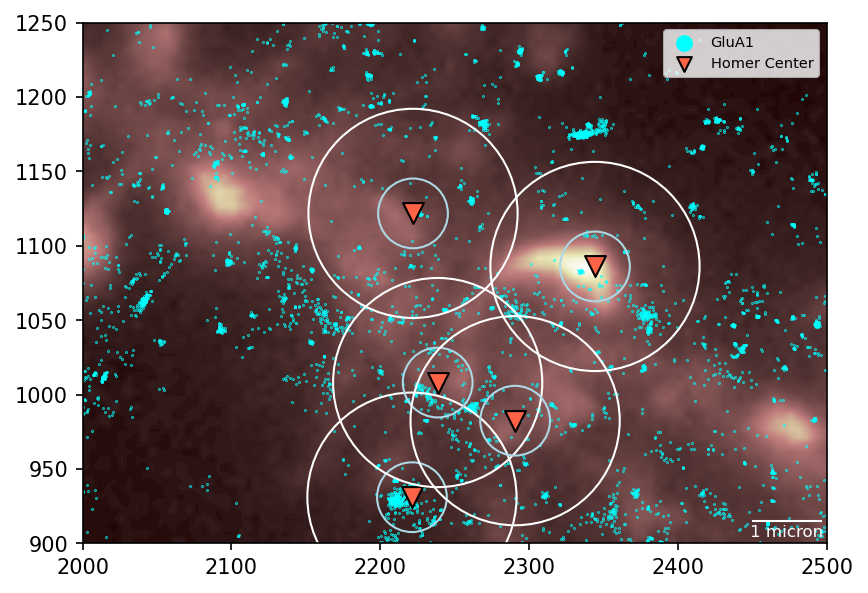

In [47]:
TestFOV.plot_region(limits=[[2000, 2500],[900, 1250]], Params=[], circle_radii=[500, 1500], 
                    show_points=['GluA1'], point_size=0.10, background_points_colors=['cyan'],
                    circle_colors=['lightblue', 'white'], background_cmap='pink', homer_color='tomato')

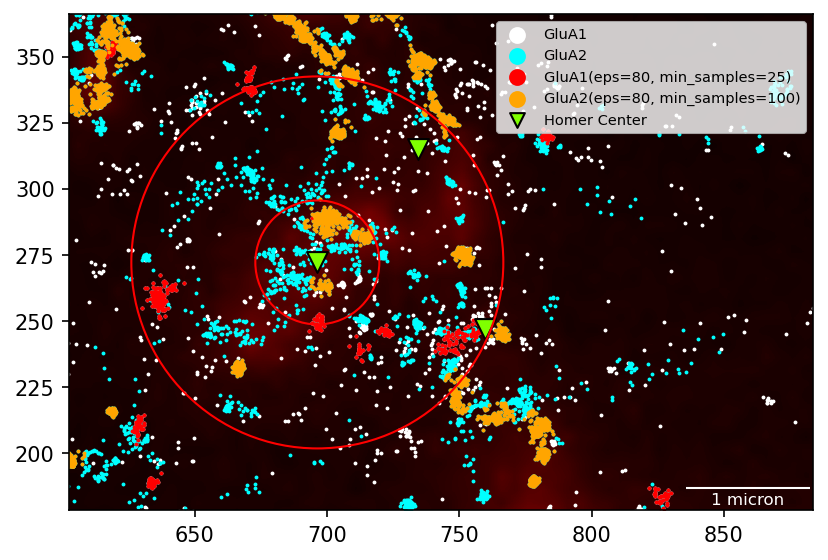

In [6]:
TestFOV.plot_homer(17, Params=Params, circle_radii=[500, 1500], show_points=['GluA1', 'GluA2'], 
                   other_homers=True)

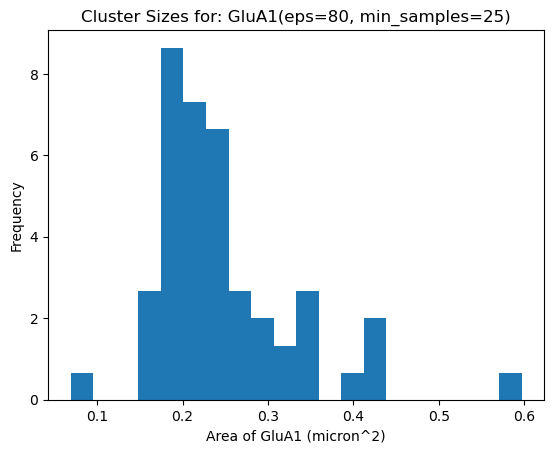

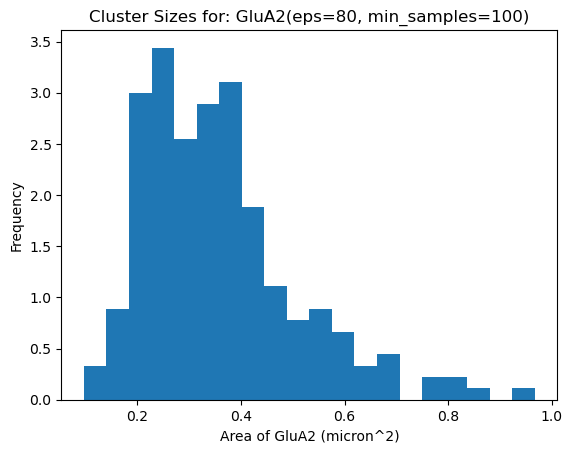

In [4]:
TestFOV.cluster_size_histogram(97.5, Params=Params, bins=20, max_dark_time=100, area=True)

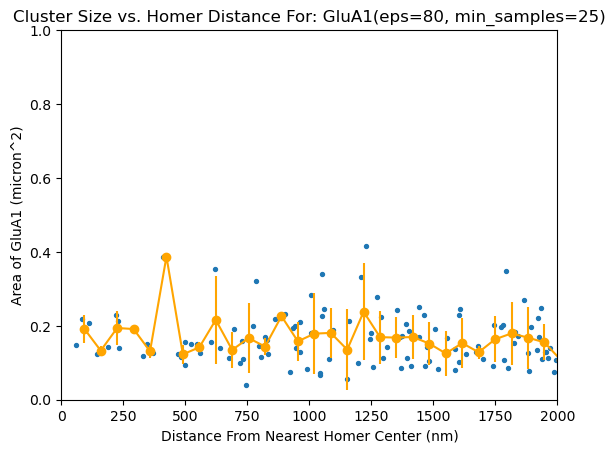

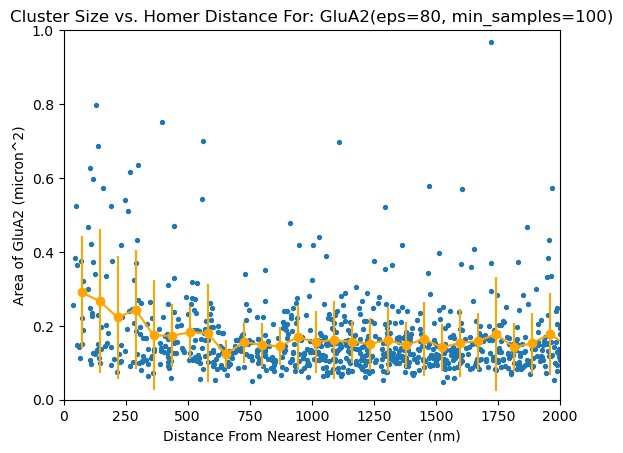

In [5]:
TestFOV.cluster_size_by_distance_to_homer_center(97.5, Params=Params, num_bins=150, 
                                                 area=True, y_top=1)

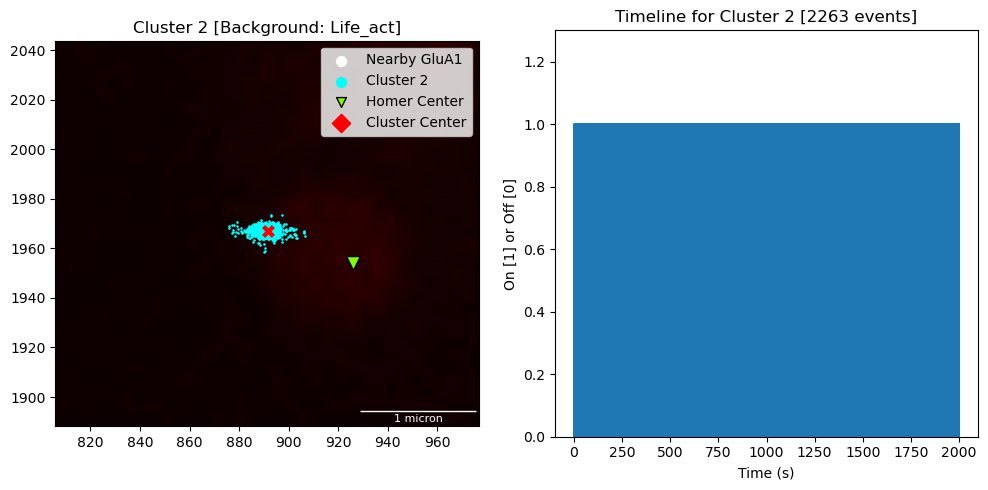

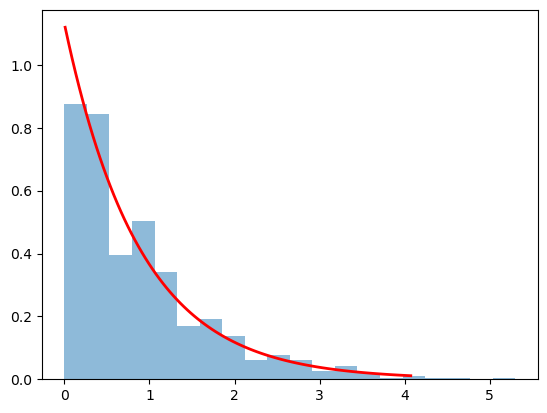

0.8840848806366047

In [8]:
Param = Params[0]
cluster_index = 2
TestFOV.clustering_results[Param][cluster_index].plot(buffer=1500, nearby_points=True)
TestFOV.clustering_results[Param][cluster_index].frames.get_average_dark_time(plot=True)

In [6]:
TestFOV.write_clusters_to_csv(filename="Cluster.csv", Tau_D=97, 
                              Params=Params[1], max_dark_time=500)

Cluster.csv created successfully!
